In [6]:
# the os library lets you change directories within python
import os
# the xarray library reads in netCDF files very easily
import pandas as pd

os.chdir( "/Users/etmu9498/research/data/in-situ")
file_name = '20210816H1_iwg1.txt'
in_situ_data = pd.read_csv( file_name, header=None)

in_situ_data

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,IWG1,20210816T061458,27.9802,-82.0162,48.0,NaN,108.8,6.3,0.0,1.3,...,272.63,298.98,346.67,271.34,29.12,29.45,73.32,26.61,26.84,302.69
1,IWG1,20210816T061459,27.9802,-82.0162,48.0,NaN,108.8,6.5,0.0,1.3,...,272.63,298.99,346.71,271.34,29.08,29.41,74.35,26.62,26.81,302.70
2,IWG1_NAMES,TIME,LATref,LONref,ALTref,GPS_GeoidHt.3,ALTPAft.d,AltRaft.1,GS.d,TAS.d,...,THdgI-GPS.4,THETA.d,THETAE.d,THETAV.d,TRadD.1,TRadS.1,TRKdesired.d,TTM.1,TTM.2,TVIRT.d
3,IWG1,20210816T061500,27.9802,-82.0162,48.0,NaN,108.8,6.2,0.0,1.3,...,272.63,298.98,346.67,271.34,29.06,30.40,72.53,26.61,26.83,302.69
4,IWG1,20210816T061501,27.9802,-82.0162,48.1,NaN,108.7,6.2,0.0,1.3,...,272.63,298.99,346.69,271.34,29.06,30.33,74.21,26.62,26.82,302.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33855,IWG1,20210816T152123,27.7956,-81.9060,1028.4,NaN,3163.3,3263.2,141.4,132.0,...,329.16,304.23,341.41,280.15,29.00,23.17,257.75,30.63,30.40,297.68
33856,IWG1,20210816T152124,27.7967,-81.9067,1024.3,NaN,3159.7,3216.8,141.4,132.5,...,329.20,304.11,341.35,280.14,28.81,22.72,258.25,30.58,30.46,297.58
33857,IWG1,20210816T152125,27.7978,-81.9074,1020.5,NaN,3140.0,3187.9,141.4,132.7,...,329.46,303.81,341.15,280.09,29.44,22.60,257.60,30.37,30.53,297.35
33858,IWG1,20210816T152126,27.7989,-81.9081,1017.1,NaN,3120.8,3203.4,141.5,132.7,...,329.72,304.05,341.35,280.03,28.56,23.04,257.89,30.67,30.61,297.64


In [23]:
# quick test to see what one column of T and power data look like
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
os.chdir( "/Users/etmu9498/research/data/CRL_data/2021")

crl_name = 'P3_20210926H1_220900-255058.cdf'
crl_data = xr.open_dataset( crl_name)
crl_data

<xarray.Dataset>
Dimensions:             (Time: 6649, layers: 594)
Dimensions without coordinates: Time, layers
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (Time) float32 ...
    Lat                 (Time) float32 ...
    H                   (layers) float32 ...
    time                (Time) float32 ...
    LSR                 (Time, layers) float32 ...
    WVMR                (Time, layers) float32 ...
    T                   (Time, layers) float32 ...
    P_ch1               (Time, layers) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu

In [24]:
# look at height values: from -3.5887 km to -.0307 km below the aircraft
# eventual goals: have a new height array from - dist to surface from P-3 to 0 km (right below P-3) for every xaxis value
# print( crl_data.H.values)

# checking that the Height values are evenly spaced... they are! at 0.0060000047 km = 6 m
# for i in range( len( crl_data.H) - 1):
#     print( crl_data.H[i+1].values - crl_data.H[i].values )

print( np.shape( crl_data.P_ch1))

xind = 780
print( len( crl_data.P_ch1[xind, : ]))
print( crl_data.T[xind, : ].values)

(6649, 594)
594
[999.        999.        999.        999.        999.        999.
 999.        999.        999.        999.        999.        999.
 999.        999.        999.        999.        999.        999.
 999.        999.        999.        999.        999.        999.
 999.         13.916687   13.9086     13.900665   13.89682    13.893921
  13.892914   13.895721   13.899353   13.906616   13.9149475  13.921875
  13.934265   13.947815   13.963623   13.979736   13.99942    14.020752
  14.043945   14.063965   14.08493    14.101593   14.11615    14.131317
  14.145447   14.158447   14.170044   14.183044   14.194519   14.20755
  14.220001   14.237305   14.2535095  14.271881   14.28949    14.309906
  14.329437   14.346741   14.363251   14.384125   14.399506   14.415314
  14.431915   14.443024   14.457001   14.471191   14.48996    14.508453
  14.526794   14.546387   14.566589   14.585022   14.599915   14.612854
  14.622681   14.63327    14.641296   14.651947   14.66217    14.672882
 

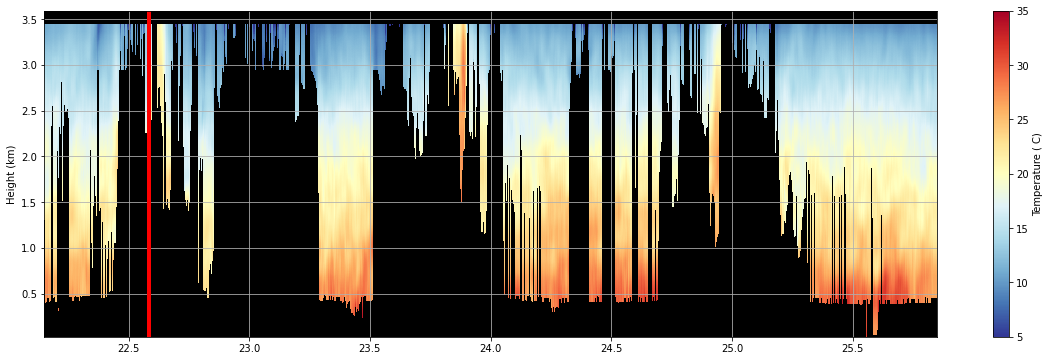

In [26]:
os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"

# where is the atm column picked above in relation to TC structure?
plt.figure( figsize = (20, 6))
make_plots.plot_T( crl_path, crl_name, 0, len( crl_data.time ) - 1, 'time')
plt.axvline(x=crl_data.time[ xind], c='r', linewidth='4')